# Mosquito Detection Tutorial

This notebook demonstrates how to use the CulicidaeLab library for detecting mosquitoes in images.

In [1]:
from culicidaelab.core.settings import get_settings
from culicidaelab.predictors.detector import MosquitoDetector
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

## 1. Initialize Settings and Load Model

First, we'll get the settings instance which will handle model weights and configurations.

In [2]:
# Get settings instance
settings = get_settings()
settings.list_model_types()

['classifier', 'detector', 'segmenter']

In [3]:
model_config = settings.get_config("predictors.detector")
model_path = settings.get_model_weights("detector")

In [4]:
# Initialize detector with correct parameters
detector = MosquitoDetector(settings=settings, load_model=True)

Weights file found at: C:\Users\lenova\AppData\Local\culicidaelab\culicidaelab\models\weights\detection\culico-net-det-v1-nano.pt


## 2. Load and Process an Image

Now let's load a test image and run detection on it.

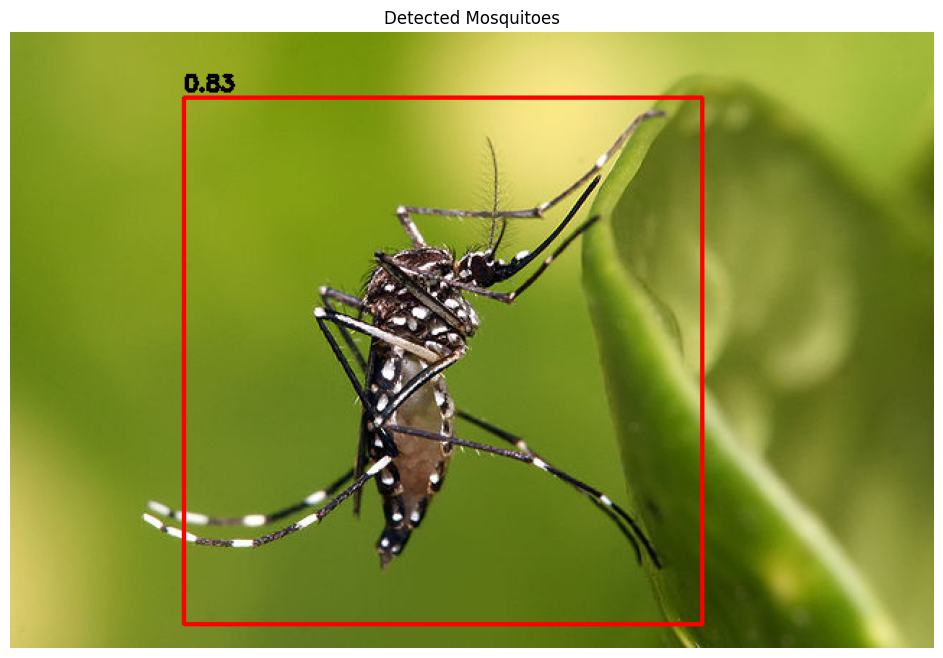


Detection Results:
Mosquito 1: Confidence = 0.83, Box = (x=299.6, y=227.9, w=359.2, h=365.3)


In [5]:
# Load test image
image_path = str(Path("test_img") / "640px-Aedes_aegypti.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run detection
detections = detector.predict(image)

# Draw detections
annotated_image = detector.visualize(image, detections)

# Display results
plt.figure(figsize=(12, 8))
plt.imshow(annotated_image)
plt.axis("off")
plt.title("Detected Mosquitoes")
plt.show()

# Print detection results
print("\nDetection Results:")
for i, (x, y, w, h, conf) in enumerate(detections):
    print(f"Mosquito {i+1}: Confidence = {conf:.2f}, Box = (x={x:.1f}, y={y:.1f}, w={w:.1f}, h={h:.1f})")

In [6]:
test_ground_truth = detections[0][:4]
evaluation = detector.evaluate([test_ground_truth], prediction=detections)
print(evaluation)
evaluation_from_raw = detector.evaluate([test_ground_truth], input_data=image)
print(evaluation_from_raw)

{'precision': 0.9999999989999999, 'recall': 1.0, 'f1': 0.9999999989999999, 'ap': 0.9999999989999999, 'mean_iou': 1.0000000742395245}
{'precision': 0.9999999989999999, 'recall': 1.0, 'f1': 0.9999999989999999, 'ap': 0.9999999989999999, 'mean_iou': 1.0000000742395245}


In [9]:
image_path2 = str(Path("test_img") / "640px-Aedes_aegypti2.jpg")
image2 = cv2.imread(image_path2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

batch = [
    image,
    image2,
    image,
    image2,
    image,
    image2,
    image,
    image2,
    image,
    image2,
    image,
    image2,
]

detections_batch = detector.predict_batch(batch)
print(detections_batch)

Predicting detection batch: 100%|██████████| 12/12 [00:01<00:00,  7.95it/s]

[[(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.8300006985664368)], [(299.6396789550781, 227.94766235351562, 359.2038, 365.33246, 0.83000069856

In [12]:
# Assuming detections_batch is in the format: [[(x,y,w,h,conf), ...], [(x,y,w,h,conf), ...], ...]
# Create ground truth batch in the correct format
batch_test_gt = [[(x, y, w, h) for (x, y, w, h, conf) in detections] for detections in detections_batch]

# Now call evaluate_batch with the correct format
batch_evaluation = detector.evaluate_batch(
    ground_truth_batch=batch_test_gt,  # List of lists of ground truth boxes
    input_data_batch=None,  # We're providing predictions directly
    predictions_batch=detections_batch,  # List of lists of predictions with confidence
    num_workers=1,  # Use single worker for deterministic results
)

print(batch_evaluation)

Calculating metrics: 100%|██████████| 12/12 [00:00<?, ?it/s]

{'precision': 0.9999999989999999, 'precision_std': 0.0, 'precision_count': 12, 'ap': 0.9999999989999999, 'ap_std': 0.0, 'ap_count': 12, 'recall': 1.0, 'recall_std': 0.0, 'recall_count': 12, 'f1': 0.9999999989999999, 'f1_std': 0.0, 'f1_count': 12, 'mean_iou': 0.9999999014711887, 'mean_iou_std': 1.1102230246251565e-16, 'mean_iou_count': 12}
